In [1]:
#load eda packages
import pandas as pd
import numpy as np

In [2]:
#load data visualiztion pacakages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#for sentiment analysis
from textblob import TextBlob

In [4]:
#load the dataset
df=pd.read_csv("drugsComTrain_raw.tsv",sep='\t')

In [5]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [6]:
df.shape

(161297, 7)

In [7]:
#columns
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [8]:
#null value 
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

+ most of the missing vaue is in Condition column
+ from herewe can say that maximum people don't know their condition by name or privacy

+ questions?
+ how many types of drug we have?

In [9]:
len(df['drugName'].unique().tolist())

3436

what is the most popular drug?

In [10]:
#lets count the value of drugs and see top 20 list
df['drugName'].value_counts().nlargest(20)


Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Medroxyprogesterone                    995
Citalopram                             995
Lexapro                                952
Bupropion / naltrexone                 950
Duloxetine                             934
Name: drugName, dtype: int64

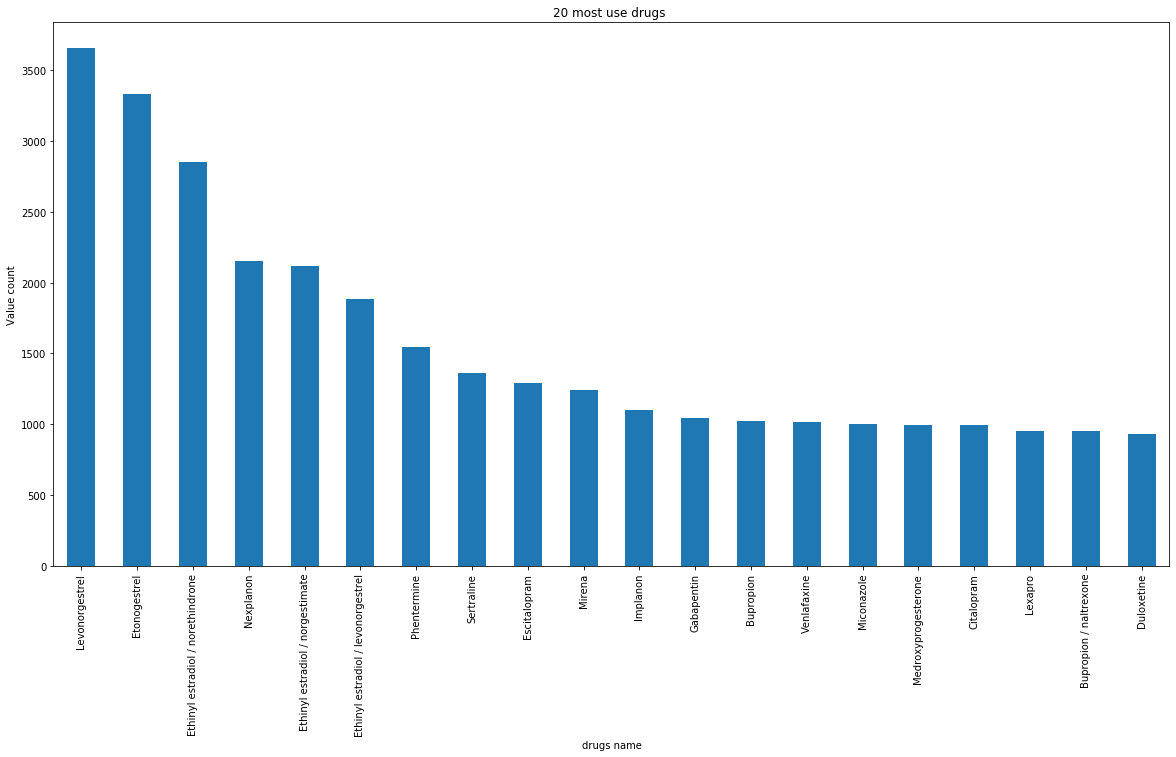

In [11]:
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.xlabel('drugs name')
plt.ylabel('Value count')
plt.title('20 most use drugs ')
plt.show()

mostof the common drugs are hormonal drugs

In [12]:
#list of lowest used 20 drugs
df['drugName'].value_counts().nsmallest(20)

Torisel                               1
TheraTears                            1
Aldomet                               1
Abacavir / lamivudine / zidovudine    1
Cefotaxime                            1
Flagyl IV                             1
Cortenema                             1
Generlac                              1
Aleve-D Sinus & Cold                  1
Hydrochlorothiazide / moexipril       1
Lanoxicaps                            1
Ethchlorvynol                         1
Ed A-Hist                             1
Collagenase                           1
Phenohytro                            1
Benadryl Allergy Sinus                1
Simbrinza                             1
Ifex                                  1
Advil PM                              1
Supprelin LA                          1
Name: drugName, dtype: int64

what are the group\classification of drug use?


In [13]:
#suffix to check the drug information
drug_suffix={"abine":"(see -arabine, -citabine)",
            "ac":"Anti-inflammatory agents (acetic acid derivatives)",
            "acetam":"See -racetam",
            "actide":"Synthetic corticotropins",
            "adol,aldol":"Analgesics (mixed opiate receptor agonists/ antagonists)",
            "adox":"Antibacterials (quinoline dioxide derivatives)",
            "afenone":"Antiarrhythmics (propafenone derivatives",
            "afil":"PDE5 inhibitors",
            "aj":"Antiarrhythmics (ajmaline derivatives)",
            "aldrate":"Antacid aluminum salts",
            "algron":"Alpha1 - and alpha2 - adrenoreceptor agonists",
            "alol":"Combined alpha and beta blockers",
            "amivir":"(see -vir)",
            "ampa":"Ionotropic non-NMDA glutamate receptors (AMPA and/or KA receptors)",
            "azole":"antifungal (except metronidazol)",
            "caine": "anesthetic",
            "cillin":"anesthetic",
            "mycin":"antibiotic",
            "micin":"antibiotic",
            "cycline":"antibiotic",
            "oxacin":"antibiotic",
            "ceph":"antibiotic",
            "cef":"anitibiotic",
            "dine":"h2 blockers(anti-ulcers)",
            "azine": "antiphyschotics(phenothiazine)",
            "barbital":"barbiurate",
            "dipine":"calcium channel blocker",
            "zolam":"cns depressants",
            "pril":"ace inhibitors",
            "artam":"arb blockers",
            "statins":"lipid lowering deugs",
            "parin":"anticoagulants",
            "sone":"corticosteroid (prednisone)"           
            }

here we write the function with to print to group the drugname if its present in suffix and show its inforation

In [14]:
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            print(True,i)
            print(drug_suffix[i])

In [15]:
classify_drug('Micanazole')

True azole
antifungal (except metronidazol)


In [16]:
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            return drug_suffix[i]

In [17]:
classify_drug('Micanazole')

'antifungal (except metronidazol)'

In [18]:
df['drug_class']=df['drugName'].apply(classify_drug)

In [19]:
df[['drugName','drug_class']]

,drugName,drug_class
0,Valsartan,None
1,Guanfacine,None
2,Lybrel,None
3,Ortho Evra,None
4,Buprenorphine / naloxone,None
...,...,...
161292,Campral,None
161293,Metoclopramide,None
161294,Orencia,None
161295,Thyroid desiccated,None


In [20]:
#how many group of drugs by class
df['drug_class'].unique().tolist()

[None,
 'antifungal (except metronidazol)',
 'antibiotic',
 'PDE5 inhibitors',
 'cns depressants',
 'h2 blockers(anti-ulcers)',
 'ace inhibitors',
 'Anti-inflammatory agents (acetic acid derivatives)',
 'corticosteroid (prednisone)',
 'See -racetam',
 'antiphyschotics(phenothiazine)',
 'anesthetic',
 'barbiurate',
 'calcium channel blocker',
 '(see -vir)',
 'anitibiotic',
 'Antiarrhythmics (propafenone derivatives',
 'anticoagulants',
 '(see -arabine, -citabine)',
 'Combined alpha and beta blockers']

In [21]:
len(df['drug_class'].unique().tolist())

20

which class of drug is most common

In [22]:
df['drug_class'].value_counts()

antifungal (except metronidazol)                      4201
antibiotic                                            3401
Anti-inflammatory agents (acetic acid derivatives)    1402
h2 blockers(anti-ulcers)                              1228
corticosteroid (prednisone)                            886
cns depressants                                        769
antiphyschotics(phenothiazine)                         664
PDE5 inhibitors                                        603
ace inhibitors                                         432
anesthetic                                             248
calcium channel blocker                                233
(see -vir)                                             189
See -racetam                                           175
Antiarrhythmics (propafenone derivatives                33
(see -arabine, -citabine)                               30
Combined alpha and beta blockers                        30
anitibiotic                                             

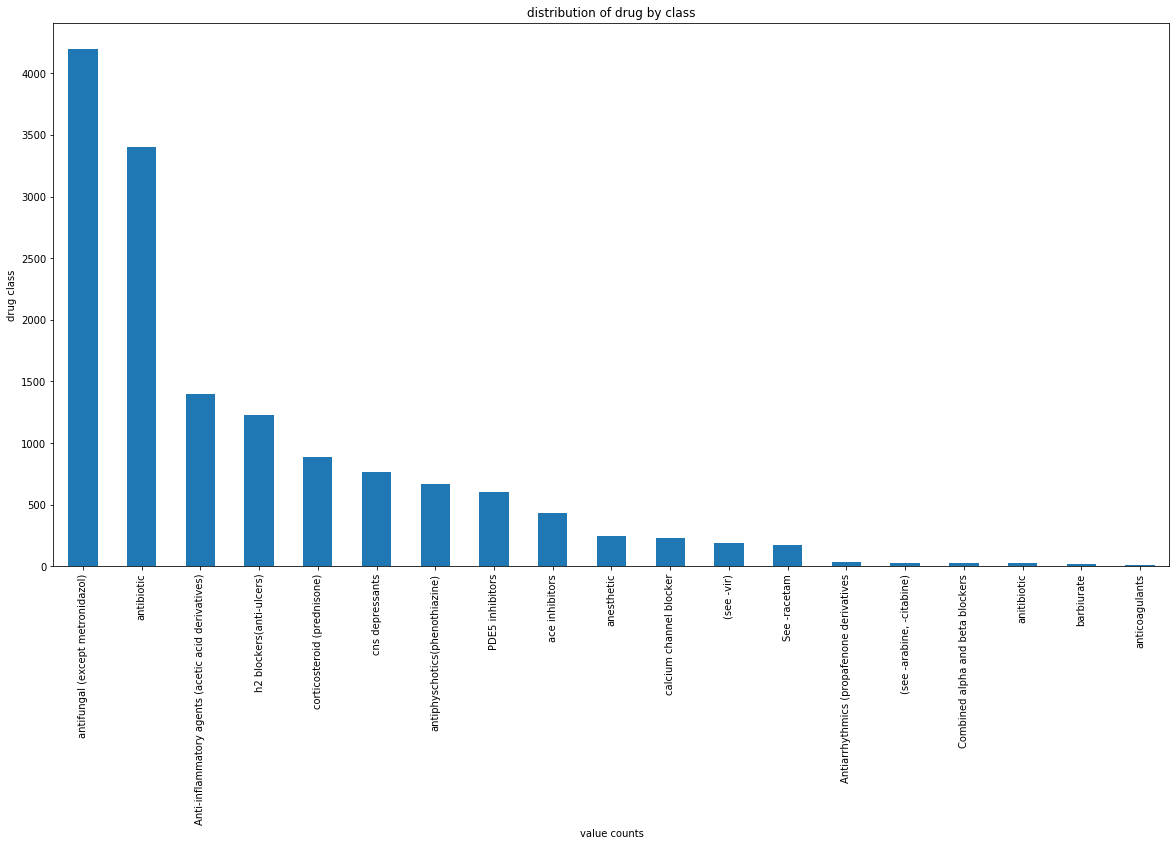

In [23]:
plt.figure(figsize=(20,10))
df['drug_class'].value_counts().plot(kind='bar')
plt.xlabel('value counts')
plt.ylabel('drug class')
plt.title('distribution of drug by class')
plt.show()

+ the most common class/group of drugs used is
+ -antifungal
+ -antibiotic

In [24]:
#distribion of Drugs per Drug Group based on size
drug_groups=df.groupby('drug_class').size()

In [25]:
type(drug_groups)

pandas.core.series.Series

In [26]:
#convert to df
#method 1
drug_groups.to_frame()

,0
drug_class,
"(see -arabine, -citabine)",30
(see -vir),189
Anti-inflammatory agents (acetic acid derivatives),1402
Antiarrhythmics (propafenone derivatives,33
Combined alpha and beta blockers,30
PDE5 inhibitors,603
See -racetam,175
ace inhibitors,432
anesthetic,248


In [27]:
#converting to df
#method 2
drug_groups_df=pd.DataFrame({'drug_class':drug_groups.index,'counts':drug_groups.values})


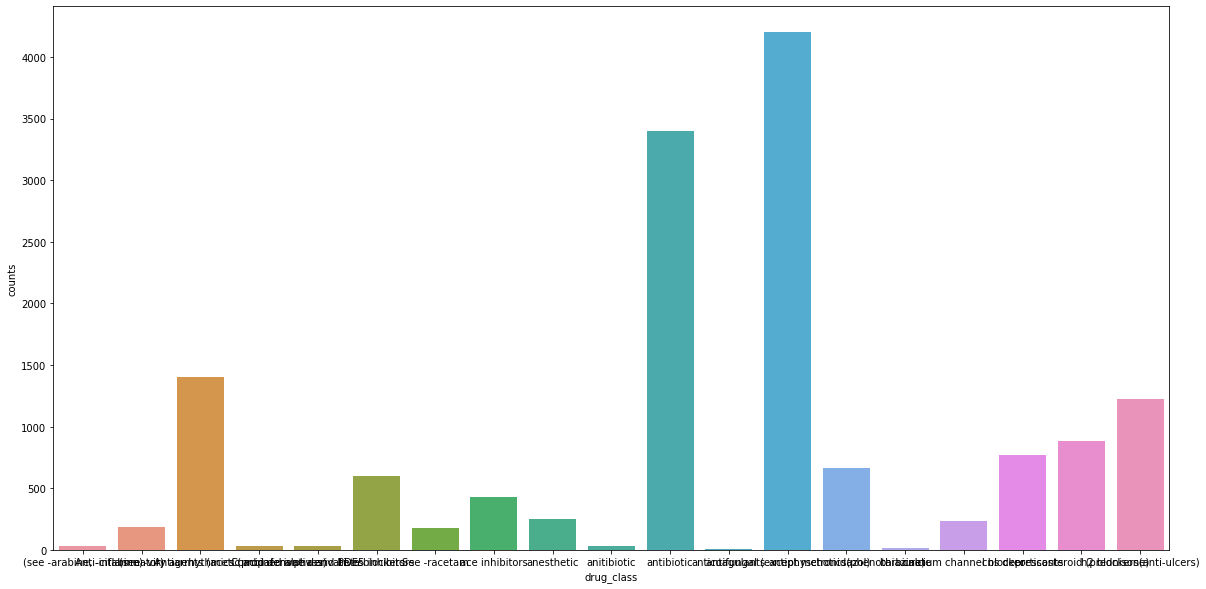

In [28]:
#seaborn plot
plt.figure(figsize=(20,10))
g= sns.barplot(data=drug_groups_df,x='drug_class',y='counts')
plt.show()

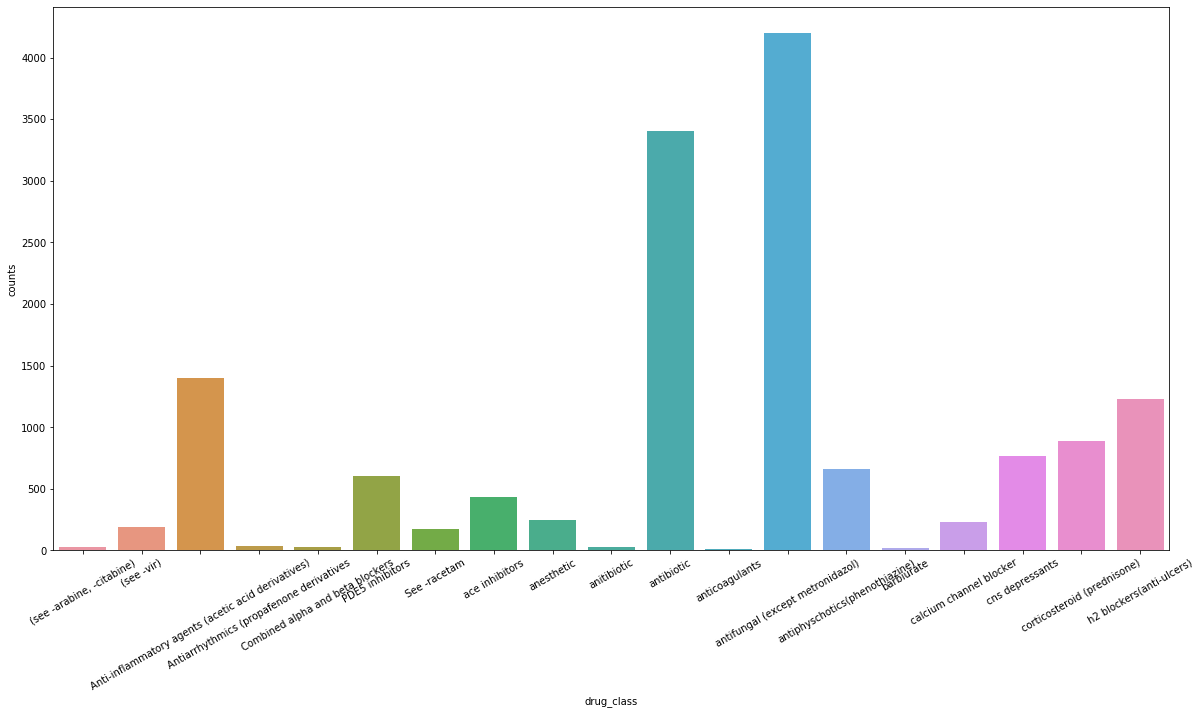

In [29]:
#editing the name below of sns barplot
plt.figure(figsize=(20,10))
g=sns.barplot(data=drug_groups_df,x='drug_class',y='counts')
g.set_xticklabels(drug_groups_df['drug_class'].values,rotation=30)
plt.show()

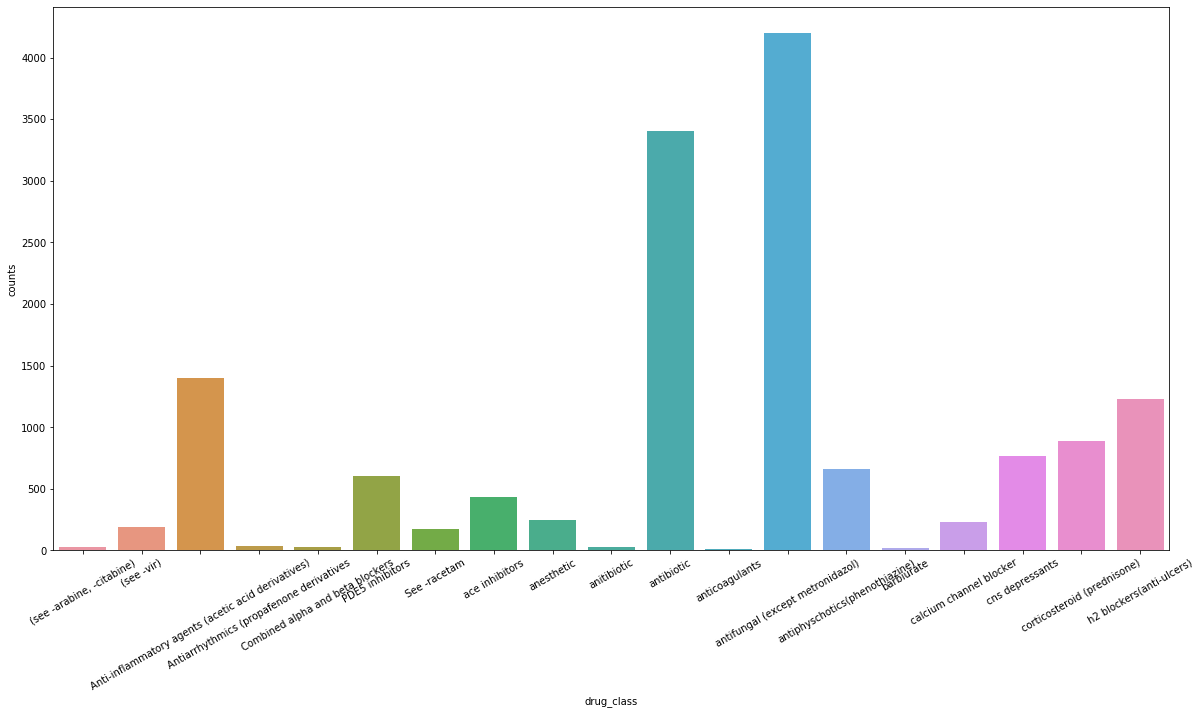

In [30]:

plt.figure(figsize=(20,10))
g=sns.barplot(data=drug_groups_df,x='drug_class',y='counts')
plt.xticks(rotation=30)
plt.show()

#### questions
+ how many conditions are there
+ which condition are the most common
+ distribution of condition and ratings

In [31]:
#numbecr of conditions
df['condition'].unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       nan, 'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'U

In [32]:
len(df['condition'].unique())

885

#### Narrative
+ we have 885 diffrent condiition

In [33]:
#### destribution od conditions
df['condition'].value_counts()

Birth Control                                  28788
Depression                                      9069
Pain                                            6145
Anxiety                                         5904
Acne                                            5588
                                               ...  
Microscopic polyangiitis                           1
Infectious Diarrhea                                1
48</span> users found this comment helpful.        1
Paragonimus westermani, Lung Fluke                 1
Acute Nonlymphocytic Leukemia                      1
Name: condition, Length: 884, dtype: int64

In [34]:
#most common conditions
df['condition'].value_counts().nlargest(20)

Birth Control                28788
Depression                    9069
Pain                          6145
Anxiety                       5904
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Bowel Preparation             1859
ibromyalgia                   1791
Smoking Cessation             1780
Migraine                      1694
Anxiety and Stress            1663
Name: condition, dtype: int64

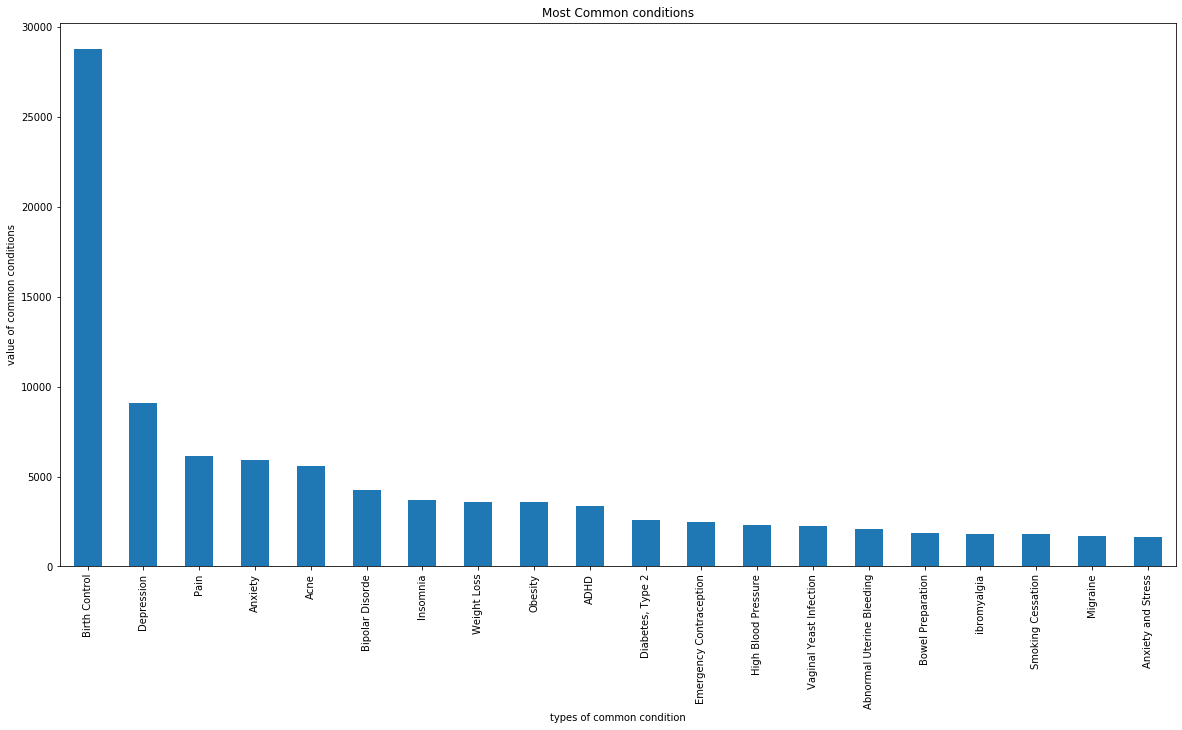

In [35]:
#plotting most common conditions
plt.figure(figsize=(20,10))
df['condition'].value_counts().nlargest(20).plot(kind='bar')
plt.title('Most Common conditions')
plt.ylabel('value of common conditions')
plt.xlabel('types of common condition')
plt.show()

### Narrative
+ as most common condition is birth control,followed by depression and pain and anyiety
+ this makes sense as compare to thedrug distribution

In [36]:
df['condition'].value_counts().nsmallest(20)

Multiple Endocrine Adenomas                    1
Occipital Neuralgia                            1
34</span> users found this comment helpful.    1
Parkinsonism                                   1
Asystole                                       1
Wilson's Disease                               1
Hypercalcemia                                  1
Corneal Ulce                                   1
Oppositional Defiant Disorde                   1
Myeloproliferative Disorders                   1
Hemophilia B                                   1
Diagnostic Bronchograms                        1
Neoplastic Diseases                            1
Dissociative Identity Disorde                  1
Tuberculosis, Active                           1
Strongyloidiasis                               1
Meningococcal Meningitis Prophylaxis           1
98</span> users found this comment helpful.    1
Cerebral Edema                                 1
Mumps Prophylaxis                              1
Name: condition, dty

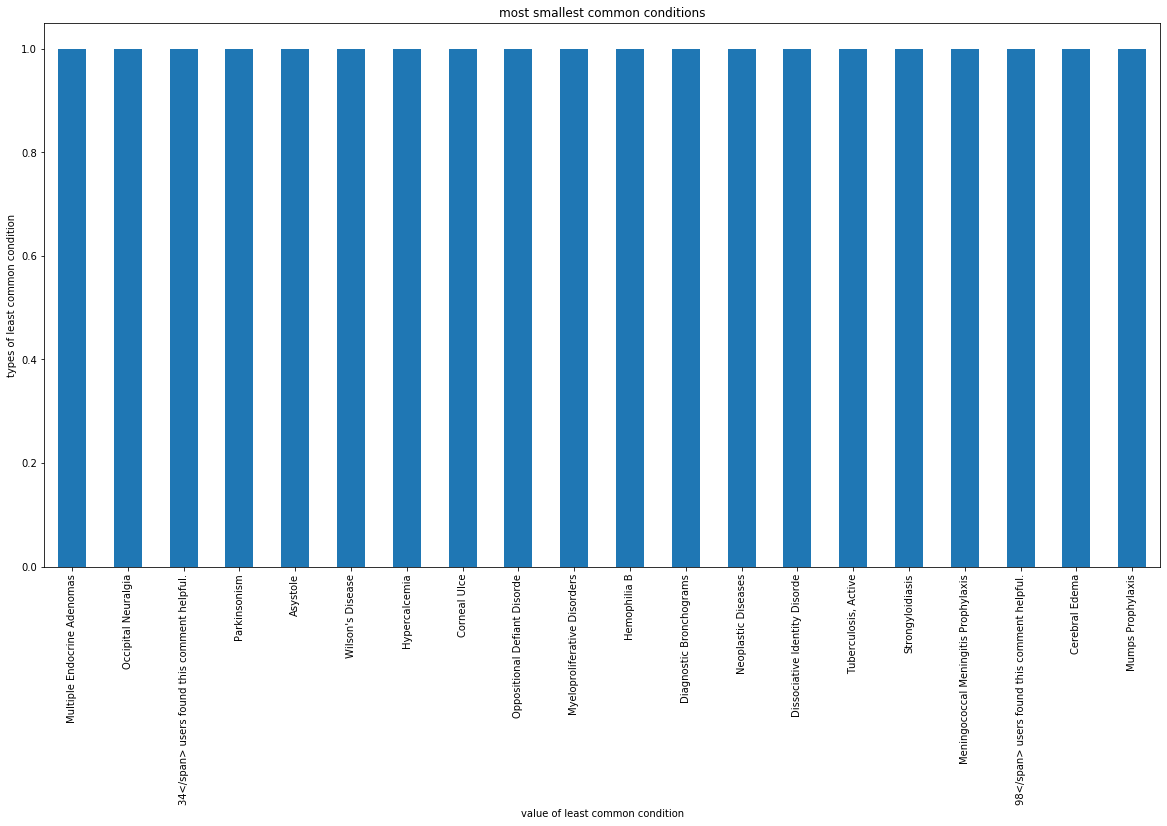

In [37]:
#least common condition
plt.figure(figsize=(20,10))
df['condition'].value_counts().nsmallest(20).plot(kind='bar')
plt.title('most smallest common conditions')
plt.xlabel('value of least common condition')
plt.ylabel('types of least common condition')
plt.show()

### questions on drugs and conditions
+ How many drugs per condition

In [38]:
df.groupby('condition')['drugName'].size()

condition
0</span> users found this comment helpful.      104
10</span> users found this comment helpful.      28
110</span> users found this comment helpful.      1
11</span> users found this comment helpful.      10
121</span> users found this comment helpful.      1
                                               ... 
unctional Gastric Disorde                         1
ungal Infection Prophylaxis                       1
ungal Pneumonia                                   1
von Willebrand's Disease                          7
zen Shoulde                                      14
Name: drugName, Length: 884, dtype: int64

In [39]:
#how many drugs per conditions (top 20)
df.groupby('condition')['drugName'].nunique().nlargest(20)

condition
Not Listed / Othe                             214
Pain                                          200
Birth Control                                 172
High Blood Pressure                           140
Acne                                          117
Depression                                    105
Rheumatoid Arthritis                           98
Diabetes, Type 2                               89
Allergic Rhinitis                              88
Bipolar Disorde                                80
Osteoarthritis                                 80
Anxiety                                        78
Insomnia                                       78
Abnormal Uterine Bleeding                      74
Migraine                                       59
Psoriasis                                      58
3</span> users found this comment helpful.     57
Endometriosis                                  57
ADHD                                           55
Asthma, Maintenance                     

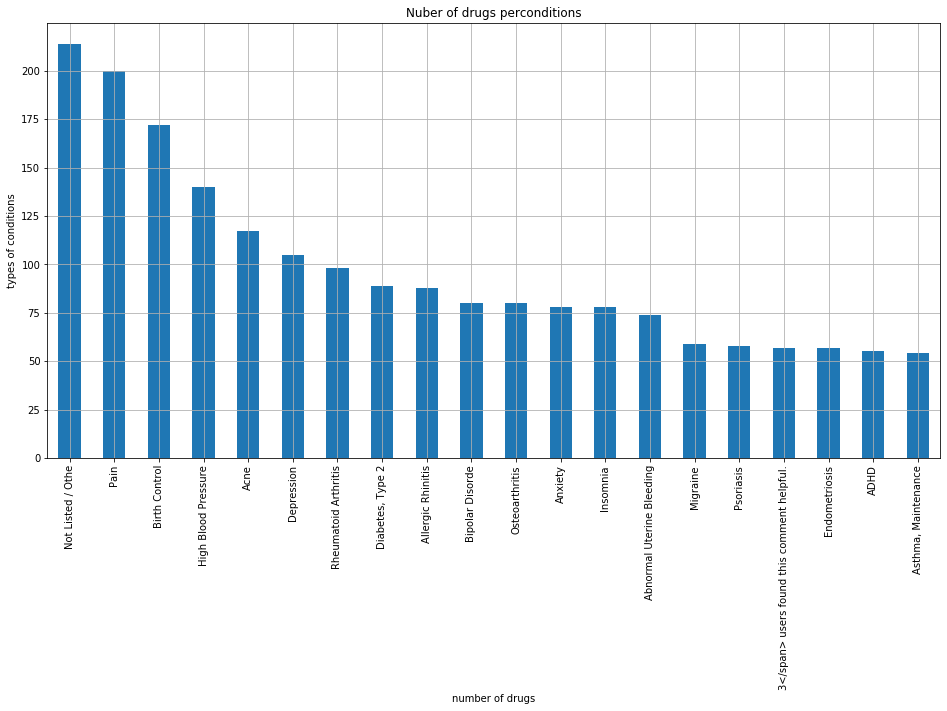

In [40]:
plt.figure(figsize=(16,8))
df.groupby('condition')['drugName'].nunique().nlargest(20).plot(kind='bar')
plt.title('Nuber of drugs perconditions')
plt.xlabel('number of drugs')
plt.ylabel('types of conditions')
plt.grid()
plt.show()

### narrative
+ Pain, Birth Control and HBP have the highest number of diffrent/unique drugs for their conditions

### questions on ratings
+ distribution of ratings
+ average ratings per count

In [41]:
df['rating']

0          9.0
1          8.0
2          5.0
3          8.0
4          9.0
          ... 
161292    10.0
161293     1.0
161294     2.0
161295    10.0
161296     9.0
Name: rating, Length: 161297, dtype: float64

In [42]:
# distribution of ratings by size
df.groupby('rating').size()

rating
1.0     21619
2.0      6931
3.0      6513
4.0      5012
5.0      8013
6.0      6343
7.0      9456
8.0     18890
9.0     27531
10.0    50989
dtype: int64

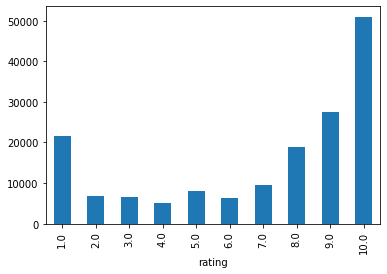

In [43]:
df.groupby('rating').size().plot(kind='bar')

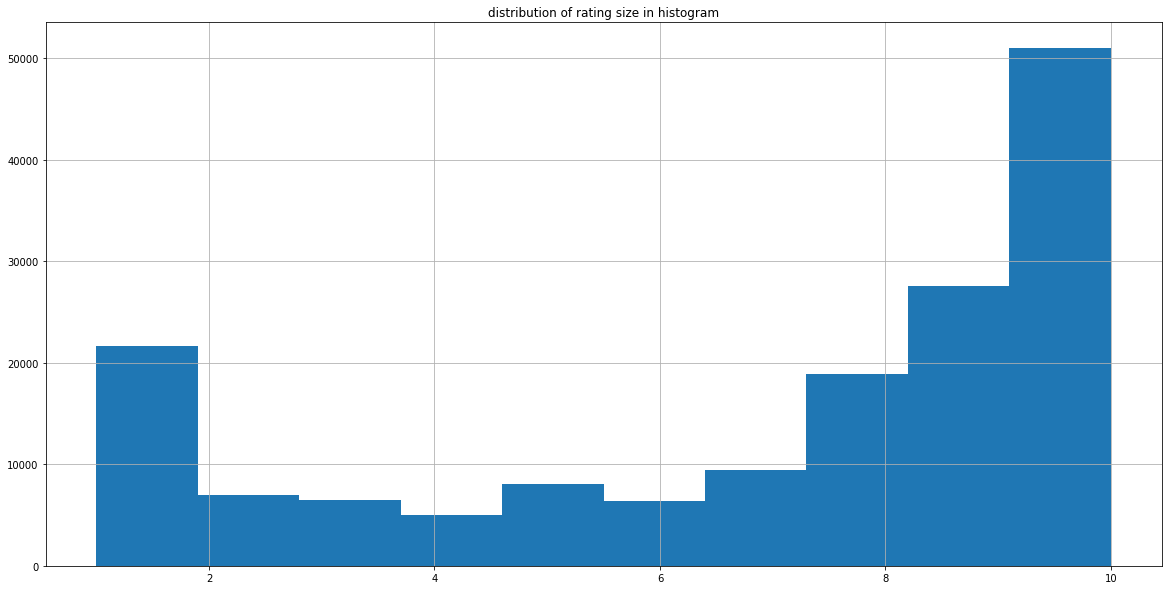

In [44]:
#dsistribution of rating by size using histogram
plt.figure(figsize=(20,10))
df['rating'].hist()
plt.title('distribution of rating size in histogram')
plt.show()

### narative
+ most people rated at the extremes

In [45]:
# average ratings
avg_rating=(df['rating'].groupby(df['drugName']).mean())
avg_rating

drugName
A + D Cracked Skin Relief               10.000000
A / B Otic                              10.000000
Abacavir / dolutegravir / lamivudine     8.211538
Abacavir / lamivudine / zidovudine       9.000000
Abatacept                                7.157895
                                          ...    
Zyvox                                    9.000000
ZzzQuil                                  2.500000
depo-subQ provera 104                    1.000000
ella                                     6.980392
femhrt                                   4.000000
Name: rating, Length: 3436, dtype: float64

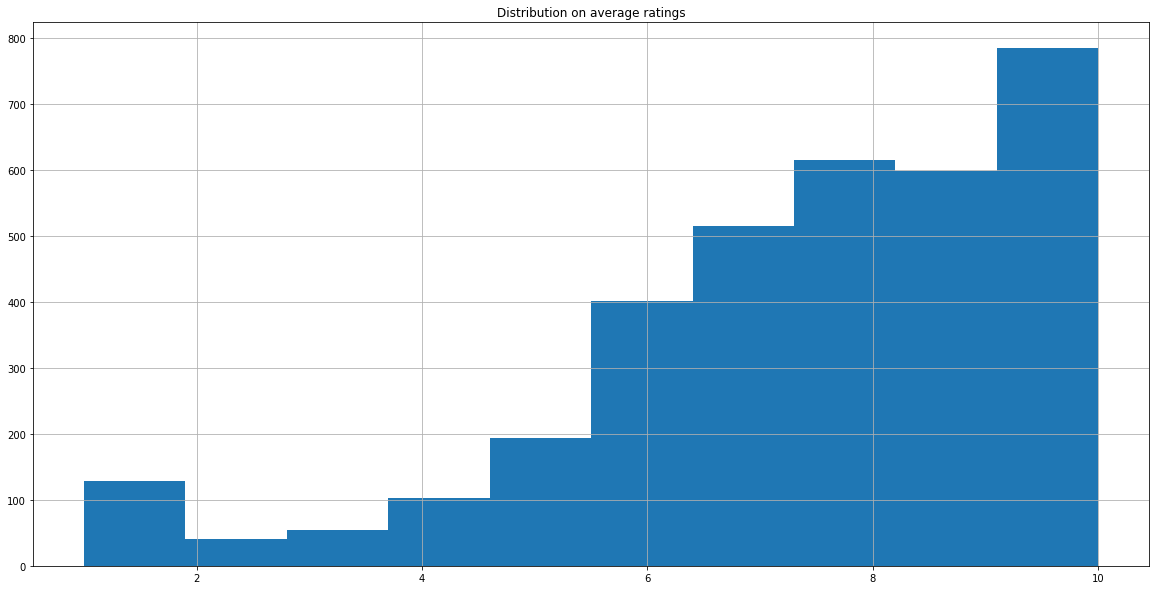

In [46]:
#average ratings for all the drugs
plt.figure(figsize=(20,10))
avg_rating.hist()
plt.title('Distribution on average ratings')
plt.show()


In [47]:
#average rating of drugs by class
avg_rating_per_drug_class=(df['rating'].groupby(df['drug_class']).mean())
avg_rating_per_drug_class

drug_class
(see -arabine, -citabine)                             7.066667
(see -vir)                                            6.899471
Anti-inflammatory agents (acetic acid derivatives)    7.669044
Antiarrhythmics (propafenone derivatives              8.242424
Combined alpha and beta blockers                      7.566667
PDE5 inhibitors                                       8.359867
See -racetam                                          6.577143
ace inhibitors                                        5.759259
anesthetic                                            6.463710
anitibiotic                                           6.344828
antibiotic                                            6.500735
anticoagulants                                        9.222222
antifungal (except metronidazol)                      5.580100
antiphyschotics(phenothiazine)                        7.146084
barbiurate                                            8.894737
calcium channel blocker                     

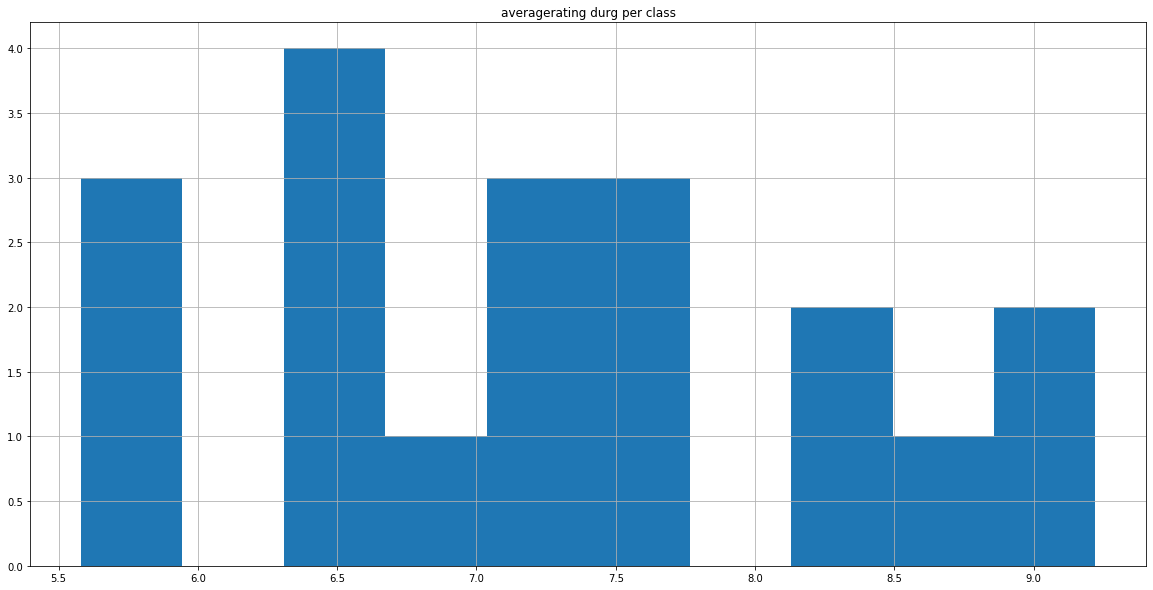

In [48]:
#histogram plot of average rating of drug per class
plt.figure(figsize=(20,10))
avg_rating_per_drug_class.hist()
plt.title('averagerating durg per class')
plt.show()

In [49]:
#which group of drug has highest men/average rating
avg_rating_per_drug_class.nlargest(10)

drug_class
anticoagulants                                        9.222222
barbiurate                                            8.894737
cns depressants                                       8.837451
PDE5 inhibitors                                       8.359867
Antiarrhythmics (propafenone derivatives              8.242424
Anti-inflammatory agents (acetic acid derivatives)    7.669044
Combined alpha and beta blockers                      7.566667
corticosteroid (prednisone)                           7.477427
h2 blockers(anti-ulcers)                              7.280945
antiphyschotics(phenothiazine)                        7.146084
Name: rating, dtype: float64

In [50]:
#which drug has the highest ratings
avg_rating.nlargest(10)

drugName
A + D Cracked Skin Relief                              10.0
A / B Otic                                             10.0
Absorbine Jr.                                          10.0
Accolate                                               10.0
Acetaminophen / caffeine / magnesium salicylate        10.0
Acetaminophen / dextromethorphan / doxylamine          10.0
Acetaminophen / phenylephrine                          10.0
Acetaminophen / pseudoephedrine                        10.0
Acetic acid / antipyrine / benzocaine / polycosanol    10.0
Acrivastine / pseudoephedrine                          10.0
Name: rating, dtype: float64

### question on review
+how genuine is the review (using sentiment analysis)

In [51]:
#how genuine is the review (using sentiment analysis)
df['review']

0         "It has no side effect, I take it in combinati...
1         "My son is halfway through his fourth week of ...
2         "I used to take another oral contraceptive, wh...
3         "This is my first time using any form of birth...
4         "Suboxone has completely turned my life around...
                                ...                        
161292    "I wrote my first report in Mid-October of 201...
161293    "I was given this in IV before surgey. I immed...
161294    "Limited improvement after 4 months, developed...
161295    "I&#039;ve been on thyroid medication 49 years...
161296    "I&#039;ve had chronic constipation all my adu...
Name: review, Length: 161297, dtype: object

In [52]:
def get_sentiment(text):
    blob=TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob=TextBlob(text)
    
    if blob.polarity>0:
        result='Positive'
        
    elif blob.polarity<0:
        result='Negative'
        
    else:
        result='Neutral'
    return result

In [53]:
#text fxn
get_sentiment_label('i love apples')

'Positive'

In [54]:
#sentiment for review
df['sentiment']=df['review'].apply(get_sentiment)

In [55]:
# sentiment lable for review
df['sentiment_label']=df['review'].apply(get_sentiment_label)

In [56]:
df[['review','sentiment','sentiment_label']]

,review,sentiment,sentiment_label
0,"""It has no side effect, I take it in combinati...",0.000000,Neutral
1,"""My son is halfway through his fourth week of ...",0.168333,Positive
2,"""I used to take another oral contraceptive, wh...",0.067210,Positive
3,"""This is my first time using any form of birth...",0.179545,Positive
4,"""Suboxone has completely turned my life around...",0.194444,Positive
...,...,...,...
161292,"""I wrote my first report in Mid-October of 201...",0.262917,Positive
161293,"""I was given this in IV before surgey. I immed...",-0.276389,Negative
161294,"""Limited improvement after 4 months, developed...",-0.223810,Negative
161295,"""I&#039;ve been on thyroid medication 49 years...",0.212597,Positive


In [57]:
#how many positive negative and neutral review
df['sentiment_label'].value_counts()

Positive    101041
Negative     53303
Neutral       6953
Name: sentiment_label, dtype: int64

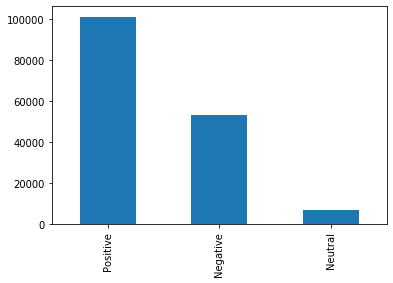

In [58]:
df['sentiment_label'].value_counts().plot(kind='bar')

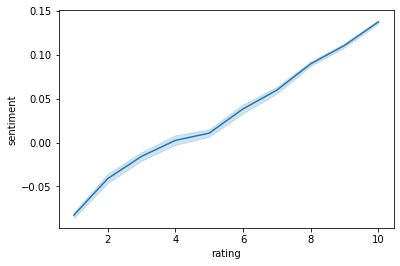

In [59]:
### correlation between our sentiment and ratings
sns.lineplot(data=df,x='rating',y='sentiment')
plt.show()

### naration
+ as the rating increses with increse in sentiment

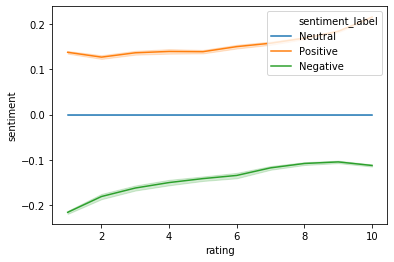

In [60]:
#correlation between rating and sentiment
sns.lineplot(data=df,x='rating',y='sentiment',hue='sentiment_label')
plt.show()

# how many of the reviews are genuine as compare to ratings
+ genuine good rating = positive sentiment+rating(10-6) 
+ genuine bad rating = negative sentiment+rating(1-4) 
+ genuine neutral rating= neutral sentiment+rating 5 

In [61]:
#genuine good review
good_review=df[(df['rating']>=6) & (df['sentiment_label']=='Positive')]

In [62]:
#genuine bad review
bad_review=df[(df['rating']<=4) & (df['sentiment_label']=='Negative')]

In [63]:
good_review.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,drug_class,sentiment,sentiment_label
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,None,0.168333,Positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,None,0.179545,Positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,None,0.194444,Positive
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,"March 14, 2015",32,antifungal (except metronidazol),0.074107,Positive
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,"December 8, 2016",1,None,0.079167,Positive


In [64]:
good_review.iloc[0]['review']

'"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'

###question on useful counts
+ number of user who found review useful
+ top usefulcount by drugs/drugs
+ best drug on useful counts

In [65]:
df.groupby('drugName')['usefulCount'].value_counts()

drugName                              usefulCount
A + D Cracked Skin Relief             6              1
A / B Otic                            20             1
Abacavir / dolutegravir / lamivudine  9              6
                                      1              5
                                      12             5
                                                    ..
ella                                  32             1
                                      42             1
femhrt                                0              1
                                      2              1
                                      42             1
Name: usefulCount, Length: 54324, dtype: int64

In [66]:
df.groupby('drugName')['usefulCount'].value_counts()

drugName                              usefulCount
A + D Cracked Skin Relief             6              1
A / B Otic                            20             1
Abacavir / dolutegravir / lamivudine  9              6
                                      1              5
                                      12             5
                                                    ..
ella                                  32             1
                                      42             1
femhrt                                0              1
                                      2              1
                                      42             1
Name: usefulCount, Length: 54324, dtype: int64

In [67]:
#top drug per useful counts
df.groupby('drugName')['usefulCount'].nunique().nlargest(10)

drugName
Fluoxetine      181
Gabapentin      181
Bupropion       177
Citalopram      176
Sertraline      172
Escitalopram    171
Prozac          171
Zoloft          171
Lexapro         169
Celexa          166
Name: usefulCount, dtype: int64

Text(0.5, 1.0, 'top drugname per count')

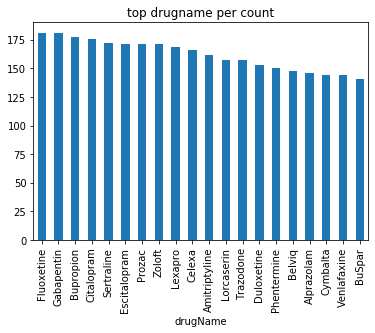

In [68]:
df.groupby('drugName')['usefulCount'].nunique().nlargest(20).plot(kind='bar')
plt.title('top drugname per count')

In [69]:
# we can do the same thing for drug_class also 
df.groupby('drug_class')['usefulCount'].nunique().nlargest(20)

drug_class
Anti-inflammatory agents (acetic acid derivatives)    177
h2 blockers(anti-ulcers)                              147
cns depressants                                       146
PDE5 inhibitors                                       142
antifungal (except metronidazol)                      139
antibiotic                                            118
ace inhibitors                                        111
calcium channel blocker                               108
corticosteroid (prednisone)                            97
antiphyschotics(phenothiazine)                         95
anesthetic                                             76
See -racetam                                           67
(see -vir)                                             34
Combined alpha and beta blockers                       28
Antiarrhythmics (propafenone derivatives               25
(see -arabine, -citabine)                              21
anitibiotic                                            20
bar

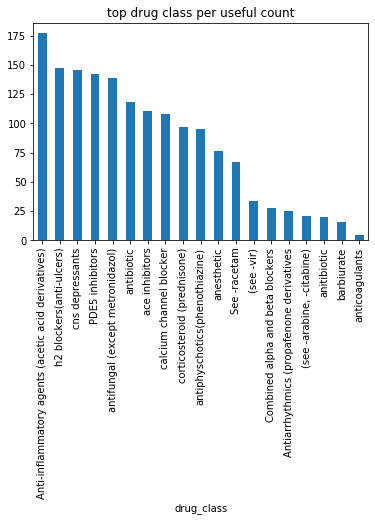

In [70]:
# we can do the same thing for drug_class also 
df.groupby('drug_class')['usefulCount'].nunique().nlargest(20).plot(kind='bar')
plt.title('top drug class per useful count')
plt.show()

we can do thesame thing for the smallest also first we group and find the unique value and select the smallest value and plot it

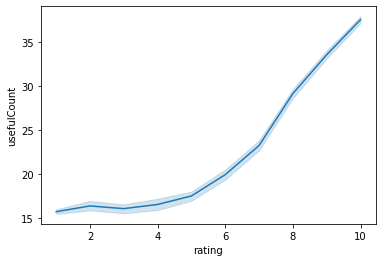

In [71]:
### correlation between rating and useful count
sns.lineplot(data=df,x='rating',y='usefulCount')

### narrative 
+ as the rating goes up usefulcount goes up

### question on date
+ distribution on rating per year
+ distribution of review per year
+ amount of review per year


In [72]:
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'drug_class', 'sentiment', 'sentiment_label'],
      dtype='object')

In [73]:
# rating per year
df.groupby('date')['rating'].size()

date
April 1, 2008        28
April 1, 2009        21
April 1, 2010        16
April 1, 2011        12
April 1, 2012        21
                     ..
September 9, 2013    44
September 9, 2014    45
September 9, 2015    90
September 9, 2016    99
September 9, 2017    55
Name: rating, Length: 3579, dtype: int64

In [74]:
# average rating per day of year
df.groupby('date')['rating'].mean()

date
April 1, 2008        8.285714
April 1, 2009        7.666667
April 1, 2010        7.812500
April 1, 2011        8.583333
April 1, 2012        9.238095
                       ...   
September 9, 2013    8.295455
September 9, 2014    8.800000
September 9, 2015    5.733333
September 9, 2016    6.777778
September 9, 2017    5.127273
Name: rating, Length: 3579, dtype: float64

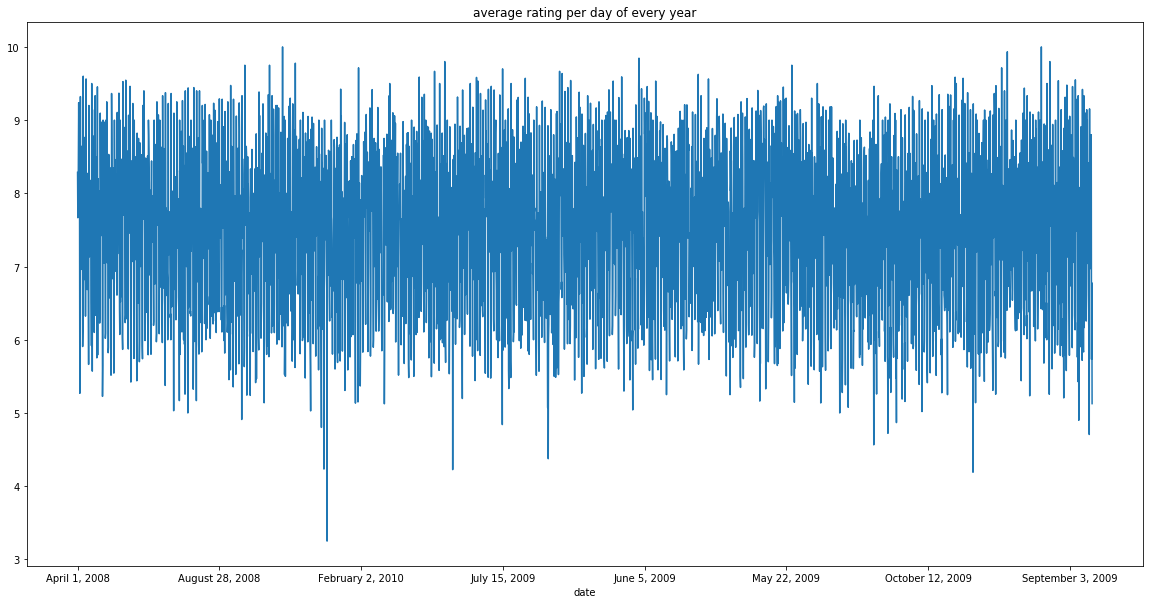

In [75]:
#average rating per day of every year
df.groupby('date')['rating'].mean().plot(figsize=(20,10))
plt.title('average rating per day of every year')
plt.show()

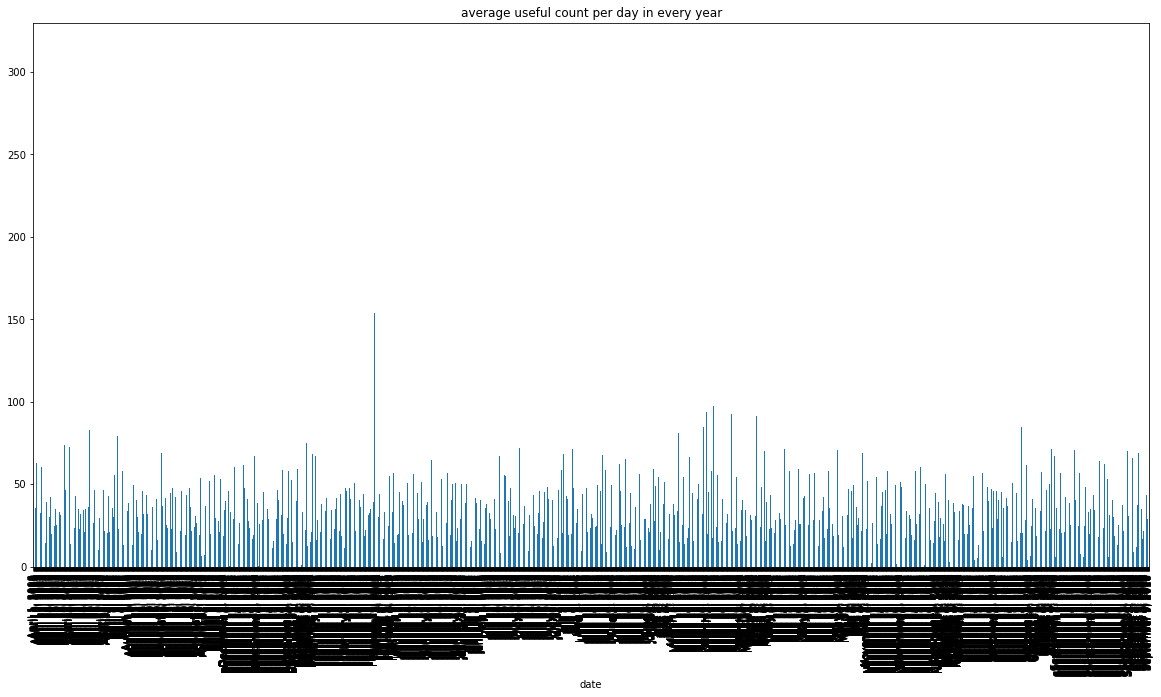

In [76]:
#average useful count per day in every year
df.groupby('date')['usefulCount'].mean().plot(kind='bar',figsize=(20,10))
plt.title('average useful count per day in every year')
plt.show()

In [77]:
###useful date time index
grouped_date=df.groupby('date').agg({'rating':np.mean,'usefulCount':np.sum,'review':np.size})
grouped_date

,rating,usefulCount,review
date,,,
"April 1, 2008",8.285714,2303,28
"April 1, 2009",7.666667,3698,21
"April 1, 2010",7.812500,342,16
"April 1, 2011",8.583333,216,12
"April 1, 2012",9.238095,1178,21
...,...,...,...
"September 9, 2013",8.295455,1941,44
"September 9, 2014",8.800000,2935,45
"September 9, 2015",5.733333,1901,90


In [78]:
grouped_date.index

Index(['April 1, 2008', 'April 1, 2009', 'April 1, 2010', 'April 1, 2011',
       'April 1, 2012', 'April 1, 2013', 'April 1, 2014', 'April 1, 2015',
       'April 1, 2016', 'April 1, 2017',
       ...
       'September 9, 2008', 'September 9, 2009', 'September 9, 2010',
       'September 9, 2011', 'September 9, 2012', 'September 9, 2013',
       'September 9, 2014', 'September 9, 2015', 'September 9, 2016',
       'September 9, 2017'],
      dtype='object', name='date', length=3579)

In [79]:
grouped_date['date']=grouped_date.index

In [80]:
grouped_date['date']=pd.DatetimeIndex(grouped_date['date'])

In [81]:
grouped_date.dtypes

rating                float64
usefulCount             int64
review                  int64
date           datetime64[ns]
dtype: object

In [82]:
grouped_date=grouped_date.set_index('date')

In [83]:
grouped_date['2008']

,rating,usefulCount,review
date,,,
2008-04-01,8.285714,2303,28
2008-04-10,9.321429,1752,28
2008-04-11,9.600000,392,10
2008-04-12,9.562500,1483,16
2008-04-13,9.200000,526,5
...,...,...,...
2008-09-05,9.333333,1332,21
2008-09-06,8.909091,233,11
2008-09-07,9.333333,892,15


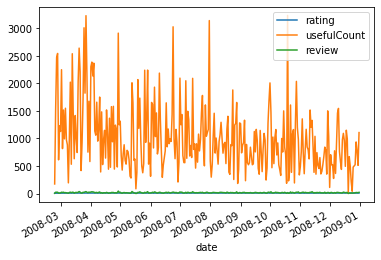

In [84]:
#select a particular date range
grouped_date['2008'].plot()

Text(0.5, 1.0, 'amount of review for 2008 adn 2009')

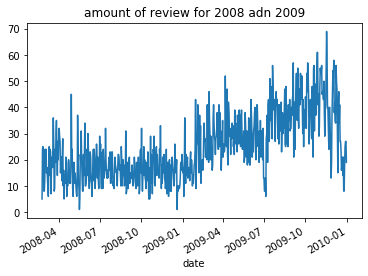

In [85]:
#amount of review for 2008 and 2009
grouped_date['2008':'2009']['review'].plot()
plt.title('amount of review for 2008 adn 2009')

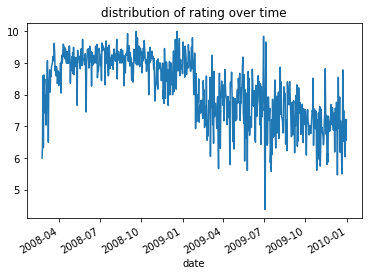

In [86]:
# amount of rating in 2008 and 2009
grouped_date['2008':'2009']['rating'].plot()
plt.title('distribution of rating over time')
plt.show()

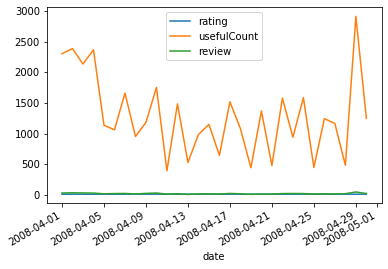

In [87]:
#on a particular day
grouped_date['2008-04'].plot()

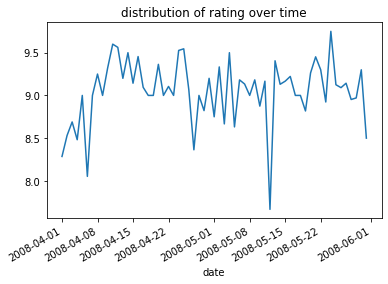

In [88]:
# amount of rating in for particular month
grouped_date['2008-4':'2008-5']['rating'].plot()
plt.title('distribution of rating over time')
plt.show()